# Del 10: Strojno učenje: Nenadzorovano učenje

## Types of Unsupervised Learning

## Challenges in Unsupervised Learning

## Preprocessing and Scaling



### Different Kinds of Preprocessing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, Normalizer,
                                   RobustScaler)
from plot_helpers import plot_scaling

In [2]:
scalers = [StandardScaler(), 
           RobustScaler(), 
           MinMaxScaler(), 
           Normalizer(norm='l2')]

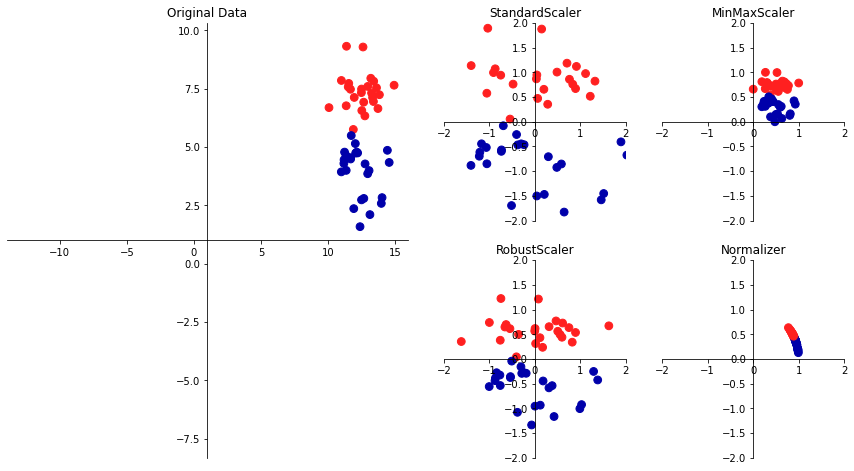

In [3]:
plot_scaling(scalers)

### Applying Data Transformations

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [5]:
cancer = load_breast_cancer()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [8]:
scaler.fit(X_train)

MinMaxScaler()

In [9]:
# transform data
X_train_scaled = scaler.transform(X_train)

In [10]:
# print dataset properties before and after scaling
print(f"transformed shape: {X_train_scaled.shape}")
print(f"per-feature minimum before scaling:\n {X_train.min(axis=0)}")
print(f"per-feature maximum before scaling:\n {X_train.max(axis=0)}")
print(f"per-feature minimum after scaling:\n {X_train_scaled.min(axis=0)}")
print(f"per-feature maximum after scaling:\n {X_train_scaled.max(axis=0)}")

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [11]:
X_test_scaled = scaler.transform(X_test)

In [12]:
# print test data properties after scaling
print(f"per-feature minimum after scaling:\n{X_test_scaled.min(axis=0)}")
print(f"per-feature maximum after scaling:\n{X_test_scaled.max(axis=0)}")

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


### Scaling Training and Test Data the Same Way

Vedno uporabimo isto transformacijo na training in test datasetu

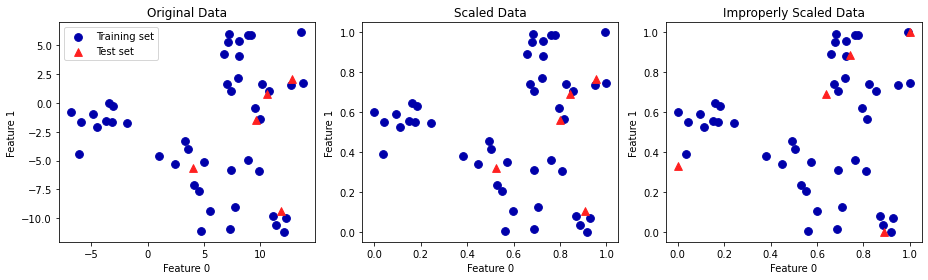

In [13]:
from sklearn.datasets import make_blobs
from plot_helpers import cm2

# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                color=cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                color=cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                color=cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                color=cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                color=cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', color=cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# calling fit and transform in sequence (using method chaining)
X_scaled = scaler.fit(X).transform(X)

# same result, but more efficient computation
X_scaled_d = scaler.fit_transform(X)

### The Effect of Preprocessing on Supervised Learning

In [14]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)

print(f"Test set accuracy: {svm.score(X_test, y_test):.2f}")

Test set accuracy: 0.94


In [15]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print(f"Scaled test set accuracy: {svm.score(X_test_scaled, y_test):.2f}")

Scaled test set accuracy: 0.97


In [16]:
scalers = [StandardScaler(), 
           RobustScaler(), 
           MinMaxScaler(), 
           Normalizer(norm='l2')]

In [17]:
for scaler in scalers:
    X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
    
    scaler_ = scaler
    scaler_.fit(X_train)
    
    X_train_scaled = scaler_.transform(X_train)
    X_test_scaled = scaler_.transform(X_test)
    
    svm = SVC(C=100)
    svm.fit(X_train_scaled, y_train)
    
    print(f"Scaler: {type(scaler).__name__}. SVM test accuracy: {svm.score(X_test_scaled, y_test):.2f}")

Scaler: StandardScaler. SVM test accuracy: 0.96
Scaler: RobustScaler. SVM test accuracy: 0.95
Scaler: MinMaxScaler. SVM test accuracy: 0.97
Scaler: Normalizer. SVM test accuracy: 0.93


## Dimensionality Reduction, Feature Extraction, and Manifold Learning

### Principal Component Analysis (PCA)

In [18]:
from plot_helpers import plot_pca_illustration

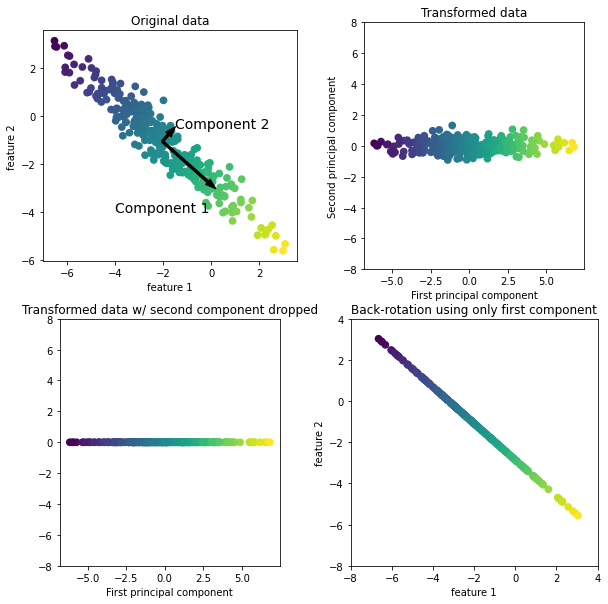

In [19]:
plot_pca_illustration()

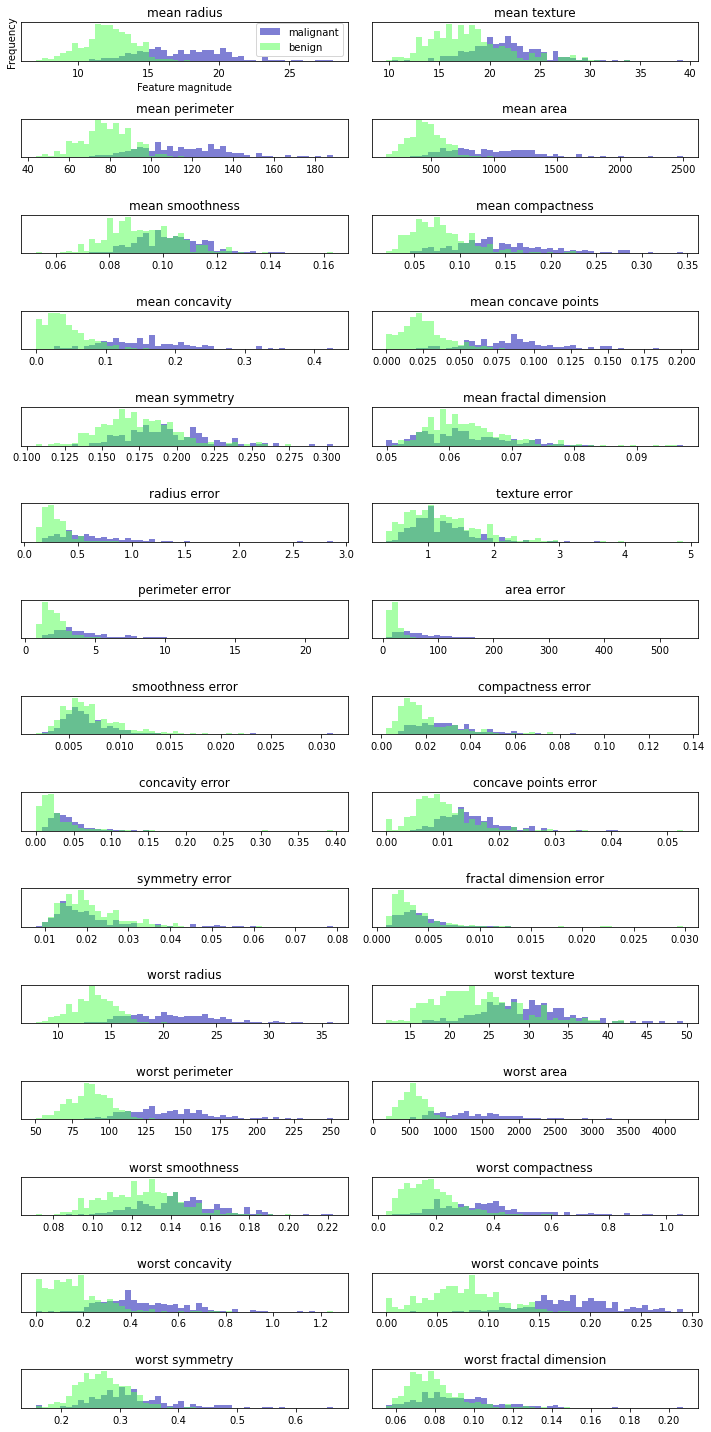

In [20]:
from plot_helpers import cm3

fig, axes = plt.subplots(15, 2, figsize=(10, 20))

malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [21]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

scaler = StandardScaler()

scaler.fit(cancer.data)

X_scaled = scaler.transform(cancer.data)

In [22]:
from sklearn.decomposition import PCA

# keep the first two principal components of the data
pca = PCA(n_components=2)

# fit PCA model to breast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)

print(f"Original shape: {str(X_scaled.shape)}")
print(f"Reduced shape: {str(X_pca.shape)}")

Original shape: (569, 30)
Reduced shape: (569, 2)


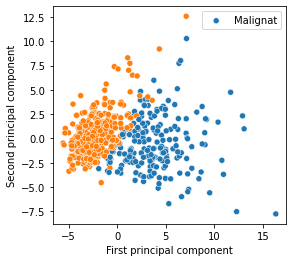

In [23]:
import seaborn as sns

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cancer.target, legend=False)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
#plt.legend(cancer.target_names, loc="best")
plt.legend(loc='upper right', labels=['Malignat', 'Benign'])
plt.gca().set_aspect("equal")
plt.show()

In [24]:
print(f"PCA component shape: {pca.components_.shape}")

PCA component shape: (2, 30)


In [26]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

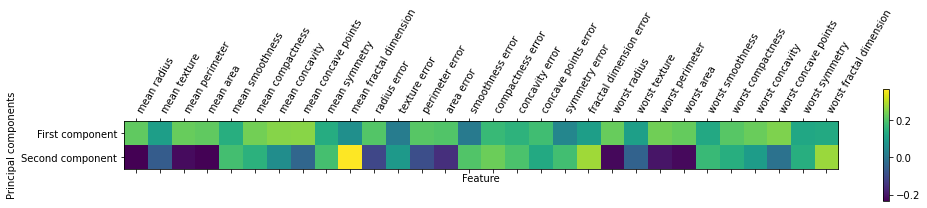

In [27]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")
plt.show()

### Non-Negative Matrix Factorization (NMF)

#### Applying NMF to synthetic data

In [28]:
from plot_helpers import plot_nmf_illustration

/opt/conda/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


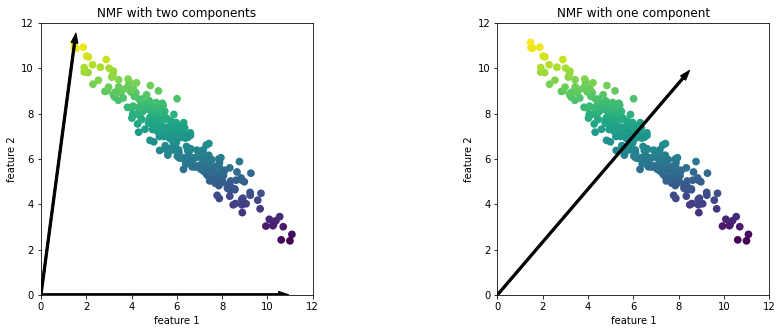

In [29]:
plot_nmf_illustration()

### Manifold Learning with t-SNE

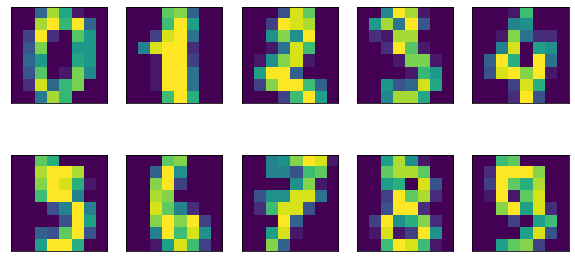

In [30]:
from sklearn.datasets import load_digits

digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5),subplot_kw={'xticks':(), 'yticks': ()})

for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

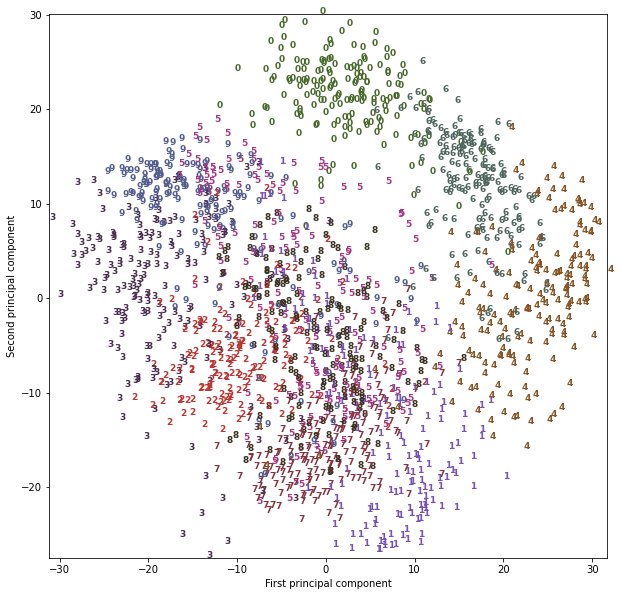

In [31]:
# build a PCA model
pca = PCA(n_components=2)

pca.fit(digits.data)

# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)

colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), color = colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})

plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

In [32]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42)

# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne.fit_transform(digits.data)

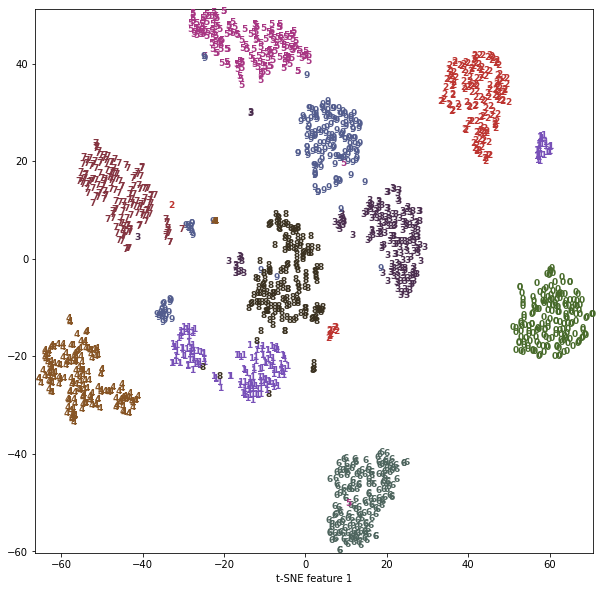

In [33]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), color = colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})

plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")
plt.show()

## Clustering

### What Is Clustering?

### Overview of Clustering Techniques


1. Partitional clustering
2. Hierarchical clustering
3. Density-based clustering



### Partitional Clustering

Prednosti:
- dobro delujejo, ko imajo gruče sferično obliko
- se dobr skalirajo, glede na kompleksnost algoritma

Slabosti:
- ne odkrijejo gruč kompleksnih oblik in velikosti
- ne delujejo dobro z gručami različnih gostot

### Hierarchical Clustering

<p>The <strong>strengths</strong> of hierarchical clustering methods include the following:</p>
<ul>
<li>They often reveal the finer details about the <strong>relationships</strong> between data objects.</li>
<li>They provide an <strong>interpretable dendrogram</strong>.</li>
</ul>
<p>The <strong>weaknesses</strong> of hierarchical clustering methods include the following:</p>
<ul>
<li>They’re <strong>computationally expensive</strong> with respect to algorithm complexity.</li>
<li>They’re sensitive to <a href="https://en.wikipedia.org/wiki/Noisy_data"><strong>noise</strong></a> and <a href="https://en.wikipedia.org/wiki/Outlier"><strong>outliers</strong></a>.</li>
</ul>

### Density-Based Clustering

<p>The <strong>strengths</strong> of density-based clustering methods include the following:</p>
<ul>
<li>They excel at identifying clusters of <strong>nonspherical shapes</strong>.</li>
<li>They’re resistant to <strong>outliers</strong>.</li>
</ul>
<p>The <strong>weaknesses</strong> of density-based clustering methods include the following:</p>
<ul>
<li>They aren’t well suited for <a href="https://en.wikipedia.org/wiki/Clustering_high-dimensional_data">clustering in <strong>high-dimensional spaces</strong></a>. </li>
<li>They have trouble identifying clusters of <strong>varying densities</strong>. </li>
</ul>

## k-Means Clustering

### Understanding the K-Means Algorithm

<img loading="lazy" class="img-fluid mx-auto d-block " src="https://files.realpython.com/media/kmeans-algorithm.a94498a7ecd2.png" width="1186" height="332" srcset="https://robocrop.realpython.net/?url=https%3A//files.realpython.com/media/kmeans-algorithm.a94498a7ecd2.png&amp;w=296&amp;sig=efa46cf1bfa03d5dac763ccfd1e1ed573afdc86a 296w, https://robocrop.realpython.net/?url=https%3A//files.realpython.com/media/kmeans-algorithm.a94498a7ecd2.png&amp;w=593&amp;sig=5d5c01463b76abb809eb35ae90ca916bb34d2bb7 593w, https://files.realpython.com/media/kmeans-algorithm.a94498a7ecd2.png 1186w" sizes="75vw" alt="k means algorithm">

<img loading="lazy" class="img-fluid mx-auto d-block w-50" src="https://files.realpython.com/media/centroids_iterations.247379590275.gif" width="576" height="576" srcset="https://files.realpython.com/media/centroids_iterations.247379590275.gif 144w, https://files.realpython.com/media/centroids_iterations.247379590275.gif 288w, https://files.realpython.com/media/centroids_iterations.247379590275.gif 576w" sizes="75vw" alt="k means centroids iterations">

### Applying k-means with scikit-learn

In [34]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

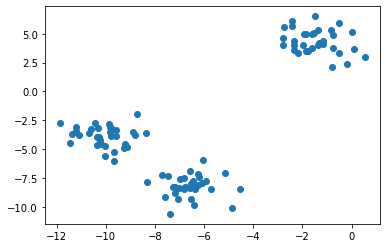

In [35]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [36]:
print(f"Cluster memberships:\n{kmeans.labels_}")

Cluster memberships:
[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


In [37]:
print(kmeans.predict(X))

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


In [38]:
kmeans.cluster_centers_

array([[ -1.4710815 ,   4.33721882],
       [ -6.58196786,  -8.17239339],
       [-10.04935243,  -3.85954095]])

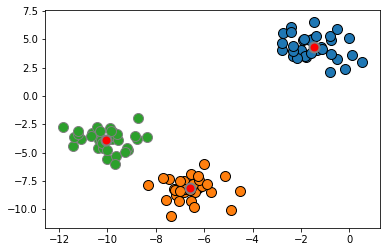

In [39]:
from plot_helpers import discrete_scatter

discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2], markers='o', markeredgewidth=2, c='r')
plt.show()

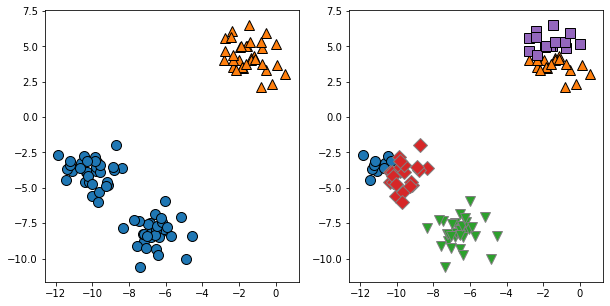

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])
plt.show()

### Failure cases of k-means

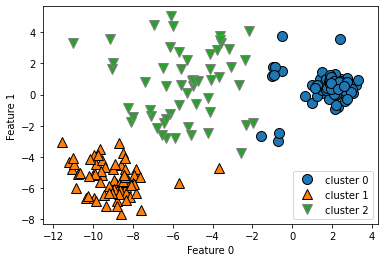

In [41]:
X_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170)

y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)

plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

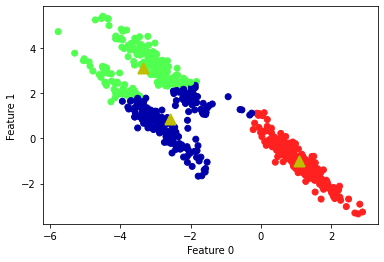

In [42]:
from plot_helpers import cm3

# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', c='y', s=100, linewidth=2, cmap=cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

### Primer: Enostaven Cluster

In [44]:
#! pip install kneed

In [45]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [46]:
features, true_labels = make_blobs(n_samples=200, centers=3, cluster_std=2.75, random_state=42)

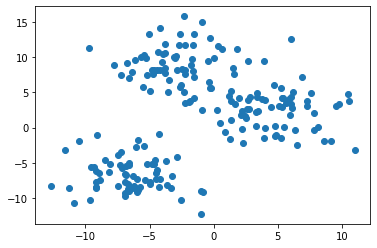

In [47]:
plt.scatter(features[:, 0], features[:, 1])
plt.show()

In [48]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [49]:
true_labels[:5]

array([1, 0, 2, 2, 2])

In [50]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [51]:
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [52]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [53]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

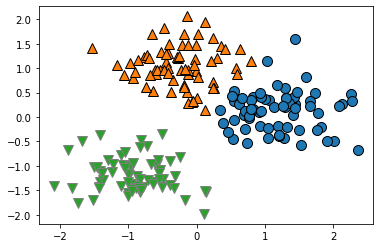

In [54]:
y_pred = kmeans.predict(scaled_features)
discrete_scatter(scaled_features[:, 0], scaled_features[:, 1], y_pred)
plt.show()

In [55]:
# The lowest SSE value
kmeans.inertia_

74.57960106819854

In [56]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 1.19539276,  0.13158148],
       [-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732]])

In [57]:
# The number of iterations required to converge
kmeans.n_iter_

6

In [58]:
kmeans.labels_[:5]

array([0, 1, 2, 2, 2], dtype=int32)

### Choosing the Appropriate Number of Clusters

In [59]:
# The elbow method
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300,"random_state": 42,}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

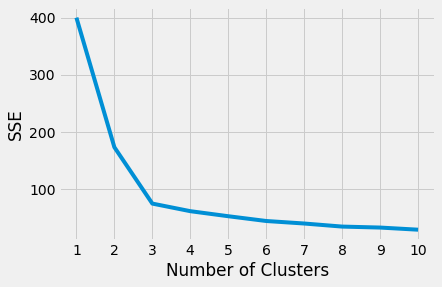

In [60]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [61]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

In [62]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

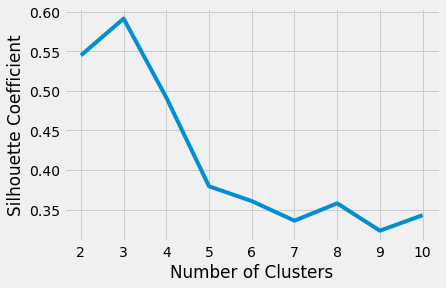

In [63]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

### Primer:  K-Means Clustering Pipeline in Python

#### Building a K-Means Clustering Pipeline

In [64]:
import tarfile
import urllib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [65]:
uci_tcga_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00401/"
archive_name = "TCGA-PANCAN-HiSeq-801x20531.tar.gz"

def download_data(uci_tcga_url, archive_name, path='data'):
    save_path = f"{path}/{archive_name}"
    
    # Build the url
    full_download_url = urllib.parse.urljoin(uci_tcga_url, archive_name)

    # Download the file
    r = urllib.request.urlretrieve (full_download_url, save_path)

    # Extract the data from the archive
    with tarfile.open(save_path, "r:gz") as tar:
        tar.extractall(path)

> Izbrišemo podatke preden damo na git!

In [67]:
download_data(uci_tcga_url, archive_name)

In [68]:
datafile = "data/TCGA-PANCAN-HiSeq-801x20531/data.csv"
labels_file = "data/TCGA-PANCAN-HiSeq-801x20531/labels.csv"

data = np.genfromtxt(datafile, delimiter=",", usecols=range(1, 20532), skip_header=1)

In [69]:
true_label_names = np.genfromtxt(labels_file, delimiter=",", usecols=(1,), skip_header=1, dtype="str")

In [70]:
data[:5, :3]

array([[0.        , 2.01720929, 3.26552691],
       [0.        , 0.59273209, 1.58842082],
       [0.        , 3.51175898, 4.32719872],
       [0.        , 3.66361787, 4.50764878],
       [0.        , 2.65574107, 2.82154696]])

In [71]:
true_label_names[:5]

array(['PRAD', 'LUAD', 'PRAD', 'PRAD', 'BRCA'], dtype='<U4')

In [72]:
label_encoder = LabelEncoder()

In [73]:
true_labels = label_encoder.fit_transform(true_label_names)

In [74]:
true_labels[:5]

array([4, 3, 4, 4, 0])

- BRCA: Breast invasive carcinoma
- COAD: Colon adenocarcinoma
- KIRC: Kidney renal clear cell carcinoma
- LUAD: Lung adenocarcinoma
- PRAD: Prostate adenocarcinoma

In [75]:
label_encoder.classes_

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype='<U4')

In [76]:
n_clusters = len(label_encoder.classes_)

In [77]:
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=2, random_state=42)),
    ]
)

In [78]:
clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters=n_clusters,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           ),
       ),
   ]
)

In [79]:
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

In [80]:
pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

In [81]:
preprocessed_data = pipe["preprocessor"].transform(data)

In [83]:
predicted_labels = pipe["clusterer"]["kmeans"].labels_

In [84]:
silhouette_score(preprocessed_data, predicted_labels)

0.5118775528450276

In [85]:
adjusted_rand_score(true_labels, predicted_labels)

0.722276752060253

In [86]:
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(data),
    columns=["component_1", "component_2"],
)

In [87]:
pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

In [88]:
pcadf.head()

,component_1,component_2,predicted_cluster,true_label
0,-5.668141,-8.872139,2,PRAD
1,-1.470204,10.280182,0,LUAD
2,-10.845387,-1.345352,3,PRAD
3,-9.167961,-8.670123,2,PRAD
4,-6.271848,-3.101208,3,BRCA


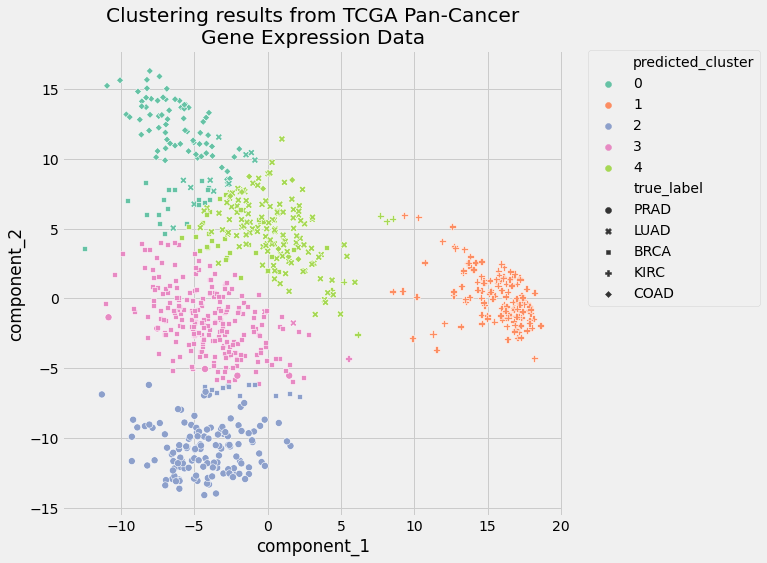

In [89]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    x = "component_1",
    y= "component_2",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    style="true_label",
    palette="Set2",
)

scat.set_title(
    "Clustering results from TCGA Pan-Cancer\nGene Expression Data"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

#### Tuning a K-Means Clustering Pipeline

In [90]:
# Empty lists to hold evaluation metrics
silhouette_scores = []
ari_scores = []
for n in range(2, 11):
    # This set the number of components for pca,
    # but leaves other steps unchanged
    pipe["preprocessor"]["pca"].n_components = n
    pipe.fit(data)

    silhouette_coef = silhouette_score(
        pipe["preprocessor"].transform(data),
        pipe["clusterer"]["kmeans"].labels_,
    )
    ari = adjusted_rand_score(
        true_labels,
        pipe["clusterer"]["kmeans"].labels_,
    )

    # Add metrics to their lists
    silhouette_scores.append(silhouette_coef)
    ari_scores.append(ari)

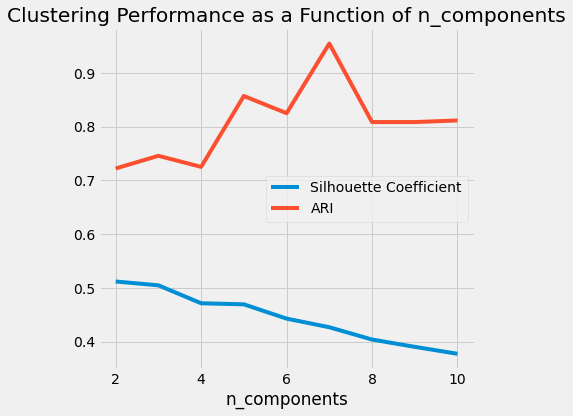

In [91]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(6, 6))
plt.plot(
    range(2, 11),
    silhouette_scores,
    c="#008fd5",
    label="Silhouette Coefficient",
)

plt.plot(range(2, 11), ari_scores, c="#fc4f30", label="ARI")

plt.xlabel("n_components")
plt.legend()
plt.title("Clustering Performance as a Function of n_components")
plt.tight_layout()
plt.show()

## Agglomerative Clustering

In [92]:
from sklearn.cluster import AgglomerativeClustering
from plot_helpers import discrete_scatter

X, y = make_blobs(random_state=1)

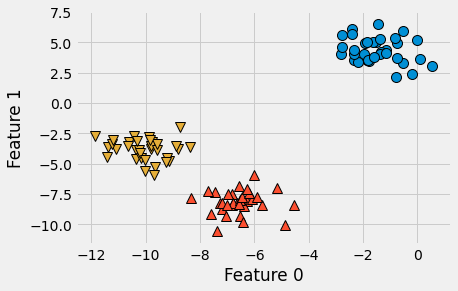

In [93]:
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

discrete_scatter(X[:, 0], X[:, 1], assignment)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

#### Hierarchical clustering and dendrograms

In [94]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)

# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X)

In [95]:
linkage_array

array([[ 1.        ,  4.        ,  0.3320945 ,  2.        ],
       [ 6.        ,  9.        ,  0.64580193,  2.        ],
       [ 2.        ,  8.        ,  0.92683223,  2.        ],
       [ 0.        , 11.        ,  1.1803787 ,  2.        ],
       [ 5.        , 15.        ,  1.30311575,  3.        ],
       [ 7.        , 13.        ,  1.4440339 ,  3.        ],
       [ 3.        , 14.        ,  1.60041812,  3.        ],
       [12.        , 18.        ,  2.07815795,  5.        ],
       [10.        , 17.        ,  2.15981886,  4.        ],
       [16.        , 20.        ,  6.55024854,  7.        ],
       [19.        , 21.        ,  7.92446877, 12.        ]])

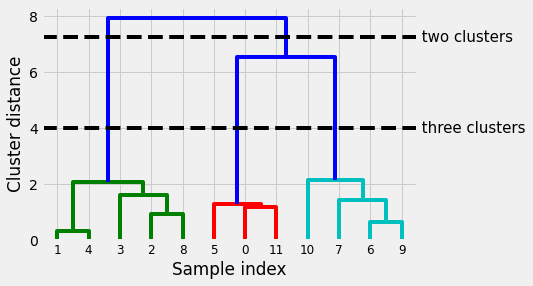

In [96]:
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# Mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

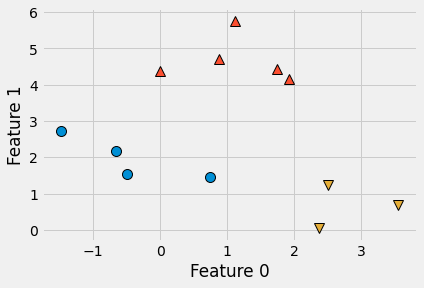

In [97]:
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

discrete_scatter(X[:, 0], X[:, 1], assignment)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

## DBSCAN

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print(f"Cluster memberships:\n{clusters}")

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


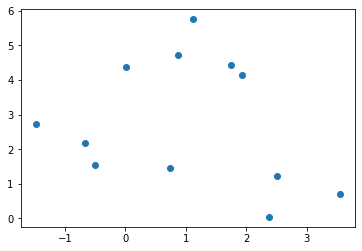

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


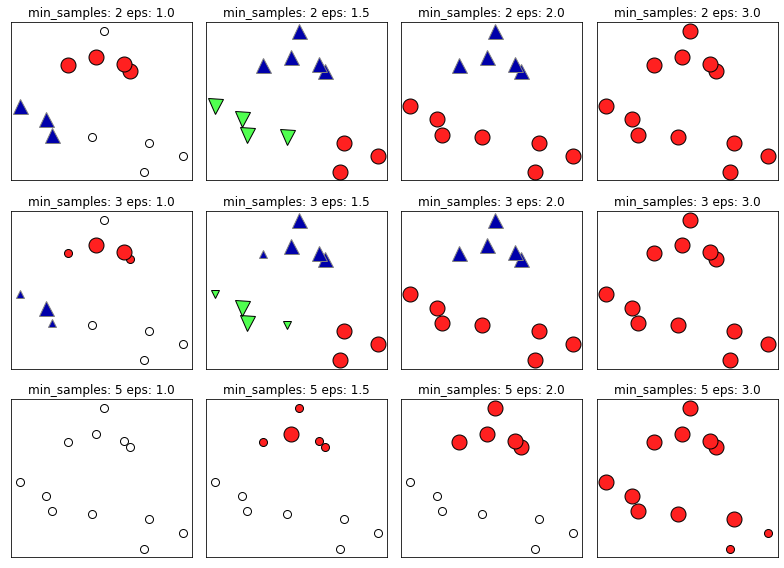

In [4]:
from plot_helpers import plot_dbscan
plot_dbscan()

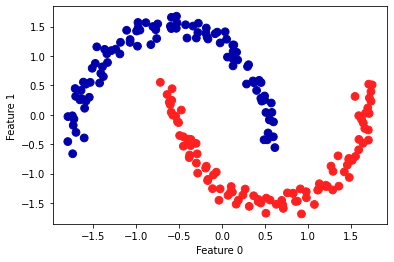

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from plot_helpers import cm2


X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

## Comparing and Evaluating Clustering Algorithms

### Evaluating clustering with ground truth

In [6]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from plot_helpers import cm3

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [8]:
import numpy as np
# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

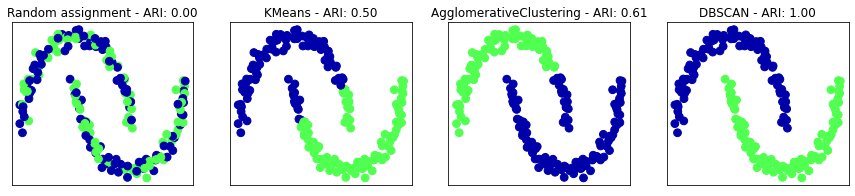

In [9]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
subplot_kw={'xticks': (), 'yticks': ()})

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=cm3, s=60)
axes[0].set_title(f"Random assignment - ARI: {adjusted_rand_score(y, random_clusters):.2f}")


for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=cm3, s=60)
    ax.set_title(f"{algorithm.__class__.__name__} - ARI: {adjusted_rand_score(y, clusters):.2f}")

In [10]:
from sklearn.metrics import accuracy_score

# these two labelings of points correspond to the same clustering
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]

# accuracy is zero, as none of the labels are the same
print(f"Accuracy: {accuracy_score(clusters1, clusters2):.2f}")
# adjusted rand score is 1, as the clustering is exactly the same
print(f"ARI: {adjusted_rand_score(clusters1, clusters2):.2f}")

Accuracy: 0.00
ARI: 1.00


### Evaluating clustering without ground truth

In [11]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [12]:
# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

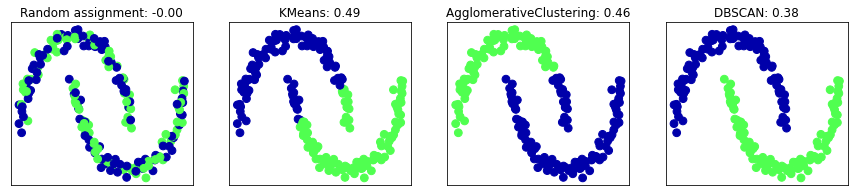

In [13]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
subplot_kw={'xticks': (), 'yticks': ()})

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=cm3, s=60)
axes[0].set_title(f"Random assignment: {silhouette_score(X_scaled, random_clusters):.2f}")


for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=cm3, s=60)
    ax.set_title(f"{algorithm.__class__.__name__}: {silhouette_score(X_scaled, clusters):.2f}")